# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [48]:
library(tidyverse)
setwd("C:/Users/Alice/Documents/GitHub/DataSciencePsychNeuro/Homeworks/hcp_data")
df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(df)
d1 <- df %>% select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)%>% drop_na()
head(d1)




,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,...,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,...,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,...,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,...,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,...,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,...,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<int>,<int>
1,100206,2,130.42,543134,807245
2,100307,1,112.56,407292,664124
3,100408,2,121.18,500417,726206
4,100610,2,126.53,512946,762308
5,101006,1,101.85,429449,579632
6,101107,2,107.04,416995,665024


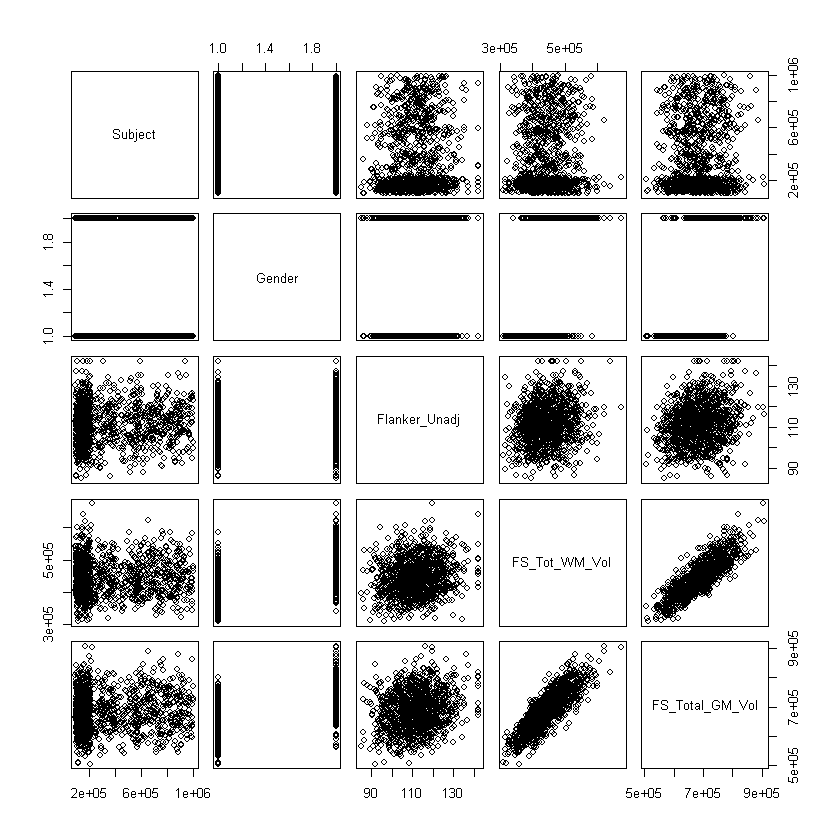

In [51]:
d1$Gender <- as.numeric(as.factor(d1$Gender))
head(d1)
pairs(d1)


> It seems that there is a positive correlation between FS_Tot_WM_Vol and FS_Totoal_GM_Vol. In addition, it looks like there is a positive correlation between Gender and each of those two varaibles (Gender and FS_Tot_WM_Vol & Gender and FS_Total_GM_Vol).
> Otherwise, there seem to be no correlation for the rest of the pairs.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [54]:
fgm = lm(Flanker_Unadj ~ FS_Total_GM_Vol, d1)
summary(fgm)
coef(fgm)
confint(fgm)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> Grey matter volume is significantly associated with Flanker Task performance.
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



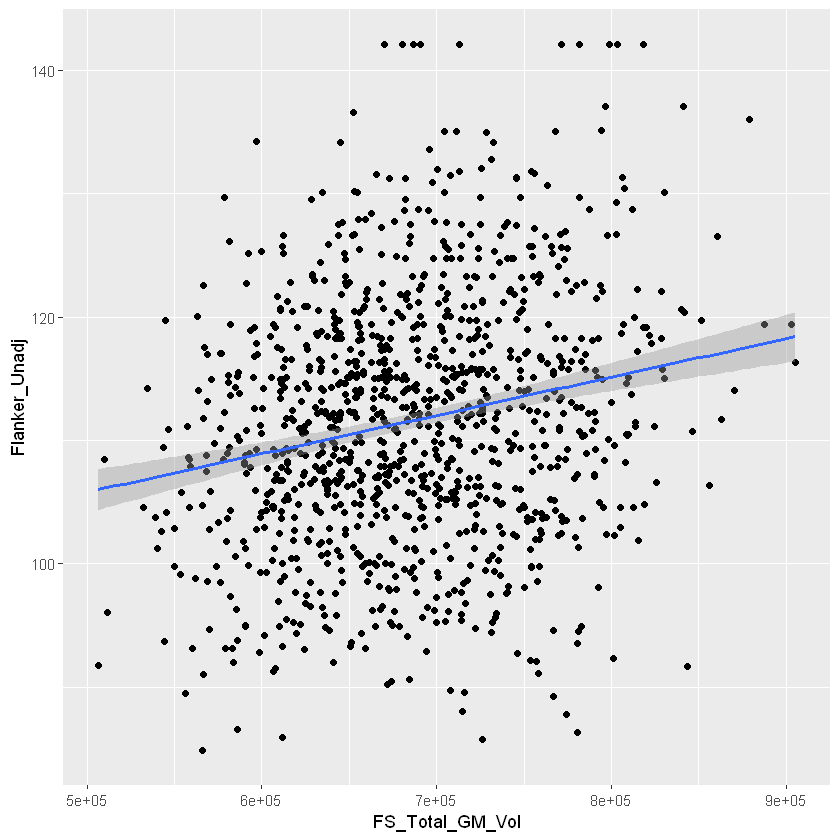

In [66]:
ggplot(d1, aes(y = Flanker_Unadj, x = FS_Total_GM_Vol)) + geom_point() + geom_smooth(method = lm, se = TRUE)


> There is a weak positive correlation between Flanker Task performance and total grey matter volume. 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> There is a weak positive correlation between Flanker Task performance and total grey matter volume. All assumptions of a linear regression model is met. Then, looking at the model evaluation measures, there is reason to believe that our model is a good fit. We have a small RSE. A significant F-statistic. Although the R-square looks small, the weak relationship might be the reason.
> 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*